#                  DATA EXPLORATION ON EMPLOYEE ATTRITION 

## 1. INTRODUCING THE DATASET

The chosen dataset for this project is the "Employee Attrition" dataset which was obtained from kaggle.com. 

This dataset includes information about employees within a specific department, their educational fields, their total working years, total working hours, attrition among others.

The aim of this project is to identify the factors that causes employee attrition within a department.

## 2. PRELIMINARY WRANGLING

In [69]:
# Importing the necessary packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline

### 2.1 VISUAL AND PROGRAMMATIC ASSESSMENT

In [66]:
# Reading the csv file
Employee_Attrition = pd.read_csv('Dataset/Employee Attrition.csv')

Employee_Attrition.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [67]:
# Identifying Null Values
Employee_Attrition.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
# Identifying the columns within the dataset
Employee_Attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
# Identifying the number of columns and rows
Employee_Attrition.shape

(1470, 35)

In [68]:
# Identifying Duplicates
Employee_Attrition.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

### 2.2 SECTION REPORT
The 
After the Visual and Programmatic exploration/assessment, these identified columns will be needed for the investigation:
1. Age
2. Attrition
3. Department
4. Distance From Home
5. Education
6. Environment Satisfaction
7. Gender
8. JobInvolvement
9. JobSatisfaction
10. MaritalStatus
11. MonthlyIncome
12. NumCompaniesWorked
13. OverTime
14. PerformanceRating
15. RelationshipSatisfaction
16. TotalWorkingYears
17. YearsAtCompany
18. YearsInCurrentRole
19. YearsSinceLastPromotion
20. YearsWithCurrManager

## 3. DATA EXPLORATION

In [48]:
# Specifying the figure size
plt.rcParams["figure.figsize"] = (8,6)

In [64]:
# Function for X axis and Y Axis
def axistitle():
    plt.xlabel('Employee Attrition')
    plt.ylabel('Attrition Count')

In [37]:
# Function for barplots

def Barplot(xaxis, yaxis):
    plot = sns.barplot(data=Employee_Attrition, x=xaxis, y=yaxis)

### 3.1 UNIVARIATE EXPLORATION

##### QUESTION: How many employess have yes and no as attritions

##### VISUALIZATION

In [47]:
# Identify the numerical attrition count
attrition_yes = Employee_Attrition['Attrition'] == 'Yes'

attrition_no = Employee_Attrition['Attrition'] == 'No'

print(f'Count for Yes is {attrition_yes.sum()} and count for no is {attrition_no.sum()}')

Count for Yes is 237 and count for no is 1233


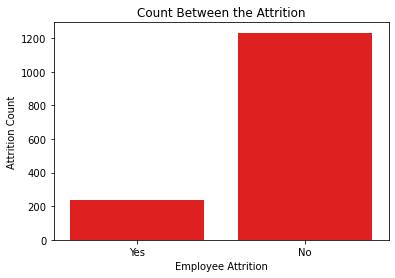

In [5]:
# Countplots for the Employee Attrition
attrition_count = sns.countplot(data=Employee_Attrition, x ='Attrition', color='red');
axistitle()
plt.title('Count Between the Attrition');

##### OBSERVATION

Based on the graph above, the attrition count for "Yes" is 237 while the attrition count for "No" is 1233. 
Therefore, there is a low employee attrition.

#### Question: How many males and females are within the organization

#### VISUALIZATION

The sum of female is 588 and the sum of male 882


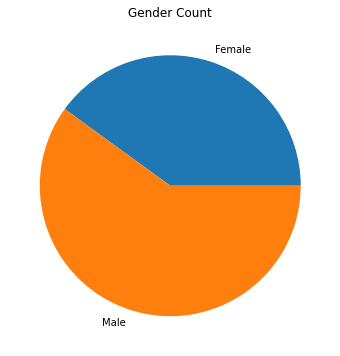

In [49]:
# Creating variables for Females and Males to create a pie chart
females = Employee_Attrition['Gender'] == 'Female'
males = Employee_Attrition['Gender'] == 'Male'
plotting = [females.sum(), males.sum()]
labelling = ['Female', 'Male']
print(f'The sum of female is {females.sum()} and the sum of male {males.sum()}')
plt.pie(plotting, labels=labelling);
plt.title('Gender Count');

#### OBSERVATION: 
There are more males than females in the dataset

#### QUESTION: What is the marital status for these male and females

#### VISUALIZATION

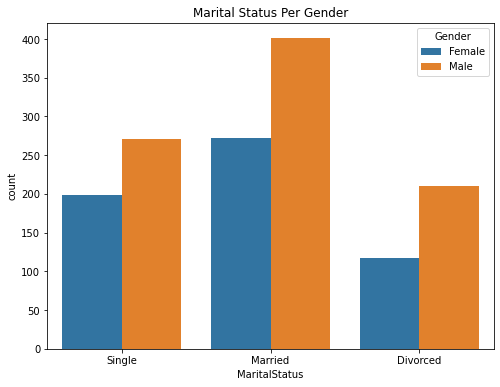

In [50]:
# Creating a countplot for the Marital Status per gender
MaritalStatus = sns.countplot(data=Employee_Attrition, x='MaritalStatus', hue='Gender');
plt.title('Marital Status Per Gender');


#### OBSERVATION

There are more married males than females

#### QUESTION: What is the attrition per Marital Status

#### VISUALIZATION

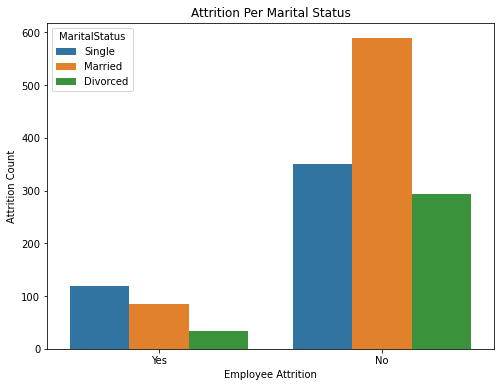

In [65]:
# Creating a countplot for the Attrition Per Marital Status
Attrition_per_Income = sns.countplot(data=Employee_Attrition, x='Attrition',hue='MaritalStatus');
plt.title('Attrition Per Marital Status');
axistitle()

#### OBSERVATION

Employees with No as their attrition has the lowest Attrition Count


### 3.2 BIVARIATE EXPLORATION

##### QUESTION: How Involved are the employees with Yes and No as their attrition.

##### VISUALIZATION

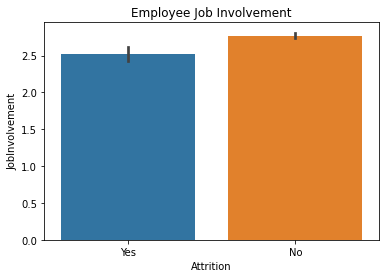

In [41]:
# Using the Barplot function to plot Employee Job Involvement
Barplot(xaxis = 'Attrition', yaxis = 'JobInvolvement' )
plt.title('Employee Job Involvement');


##### OBSERVATION

Based on the visualozation above, Employees with Yes as their attrition have a lower Job Involvement.

#### QUESTION: What Gender has the highest Employee Attrition?

#### VISUALIZATION

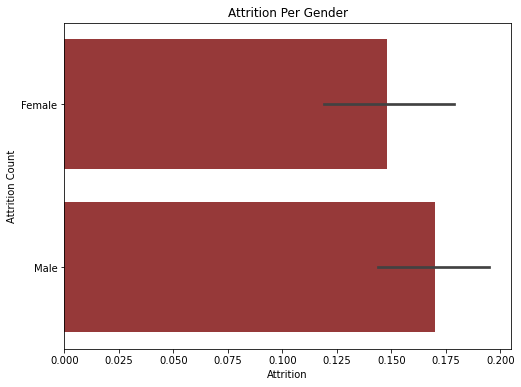

In [51]:
# Creating a bar plot to identify the highest Employee attrition between gender
gender_attriton = sns.barplot(x=attrition_yes, y=Employee_Attrition['Gender'], color='brown');
plt.title('Attrition Per Gender')
plt.ylabel('Attrition Count');

#### OBSERVATION

Males have a higher attrition as compared to females

#### QUESTION: How is their performace rating?

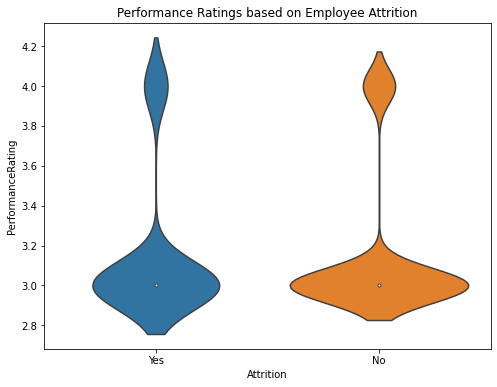

In [52]:
# Creating a violin plot for the performance rating
performance_rating = sns.violinplot(data=Employee_Attrition, x='Attrition', y='PerformanceRating');
plt.title('Performance Ratings based on Employee Attrition');


#### OBSERVATION:

Employees with 'Yes' as their Employee Attrition has a lower performance rating

#### QUESTION: How much is their income

##### VISUALIZATION

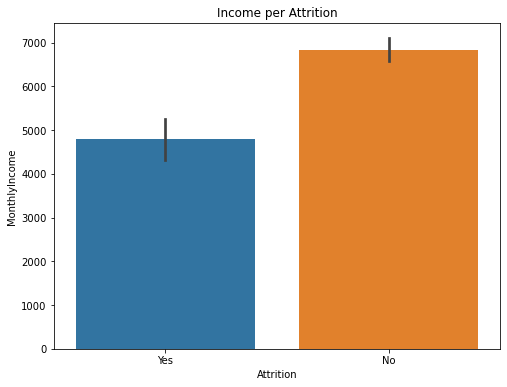

In [53]:
# A Barplot for the income per attrition
Barplot(xaxis='Attrition', yaxis='MonthlyIncome')
plt.title('Income per Attrition');

##### OBSERVATION

Employees with yes as their attrition receives lower salary


#### QUESTION: Is there a correlation between Job Satisfaction and Relationship Satisfaction?

#### VISUALIZATION

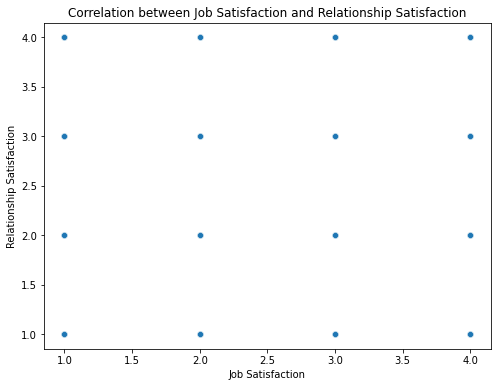

In [62]:
# A Scatterplot to identify the correlation between Job Satisfaction and Relationship Satisfaction
corr = sns.scatterplot(data=Employee_Attrition, x='JobSatisfaction', y = 'RelationshipSatisfaction');
plt.title('Correlation between Job Satisfaction and Relationship Satisfaction')
plt.xlabel('Job Satisfaction');
plt.ylabel('Relationship Satisfaction');

#### OBSERVATION
There seem to be no correlation between Job Satisfaction and Relationship Satisfaction

#### QUESTION: Is there a correlation between the Job Satisfaction and Monthly Income

#### VISUALIZATION

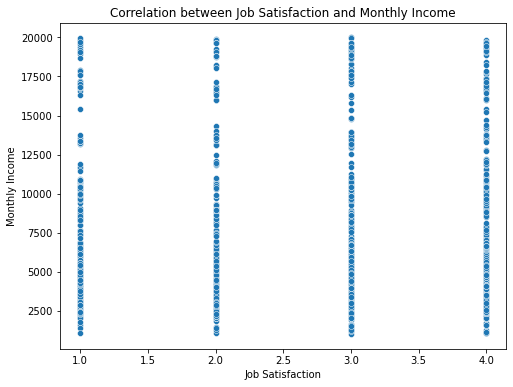

In [61]:
# A Scatterplot to identify the correlation between Job Satisfaction and Monthly Income
sns.scatterplot(data=Employee_Attrition, x='JobSatisfaction', y='MonthlyIncome');
plt.title('Correlation between Job Satisfaction and Monthly Income');
plt.xlabel('Job Satisfaction');
plt.ylabel('Monthly Income');

#### OBSERVATION
There seem to be no correlation between the Job Satisfaction and Monthly Income

#### QUESTION: Could Distance be one Reason for Employee Attrition?

#### VISUALIZATION

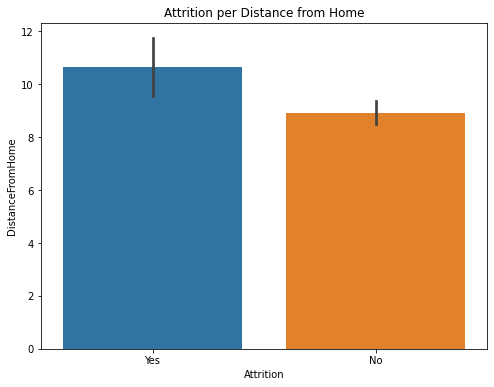

In [56]:
# A Barplot to depict the distance from home per the attrition type
Barplot(xaxis='Attrition', yaxis='DistanceFromHome')
plt.title('Attrition per Distance from Home');

#### OBSERVATION

Employees with Yes as their attrition have a higher distance from home

#### QUESTION: How much is their hourly rate?

#### VISUALIZATION

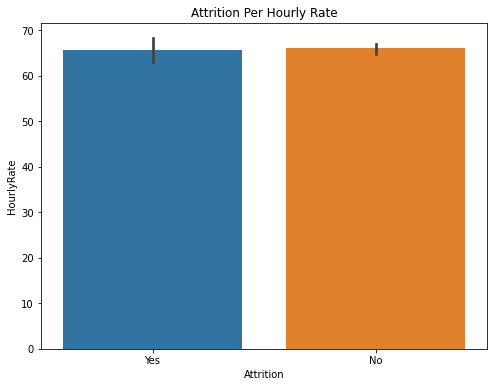

In [55]:
# A Barplot to depict the hourly rate per the attrition type
Barplot(xaxis='Attrition', yaxis='HourlyRate')
plt.title('Attrition Per Hourly Rate');

#### OBSERVATION:

Based on the Visualization, all employees have the same hourly rate

#### QUESTION: Is there a correlation between the Monthly Rate and Monthly Income?

#### VISUALIZATION

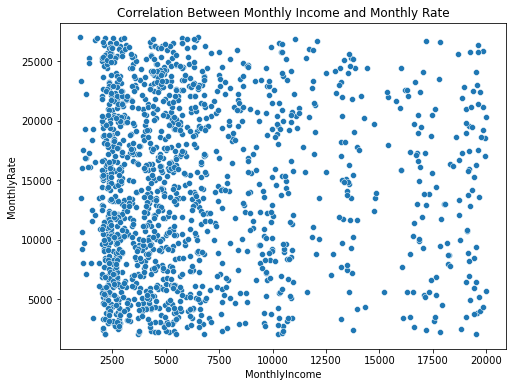

In [60]:
# A Scatterplot to identify the correlation between Monthly Income and Monthly Rate
sns.scatterplot(data=Employee_Attrition, x='MonthlyIncome', y='MonthlyRate');
plt.title('Correlation Between Monthly Income and Monthly Rate');

#### OBSERVATION

There is no clear correlation between the Monthly Income and the Monthly Rate

### 3.3 MULTIVARIATE EXPLORATION

#### Question: Which Department has the highest attrition and by how many males and females

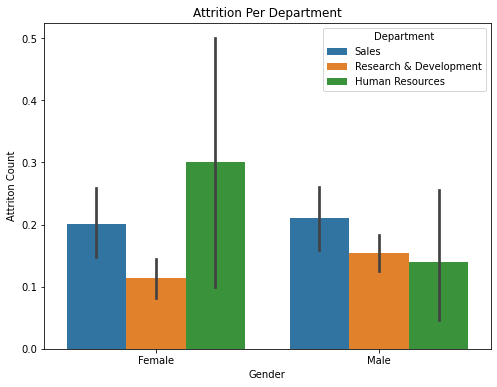

In [59]:
# A Barplot to depict the attrition per department
department_attrition = sns.barplot(y=attrition_yes, x=Employee_Attrition['Gender'], hue=Employee_Attrition['Department']);
plt.title('Attrition Per Department')
plt.ylabel('Attriton Count');

#### Observation

Within the Human Resources department, females have a higher attrition

Within the R&D Department, males have a higher attrition

Within the Sales Department, Both males and females have an equal attrition

##### QUESTION: How much is their income (Based on Department)

##### VISUALIZATION

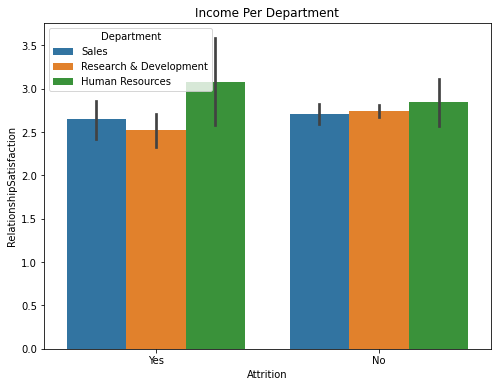

In [58]:
# A Barplot to depict the income per department
department_income = sns.barplot(data=Employee_Attrition, x='Attrition', y='RelationshipSatisfaction', hue='Department');
plt.title('Income Per Department');

#### OBSERVATION

Department wise, employees with Yes as their attrition has a higher income as compared to employees with No as their attrition

## 4. CONCLUSION

The intial aim for undertaking this project was to identify the major causes for high attrition rate within an organization.

Based on the dataset, it was identified that the attrition rate within this organization was lower than expected.

Withinn the dataset were males and females all working within a specific department - Research and Development, Sales and Human Resources.

Out of these male and females were married couples, singles and divorced.

Various factors could cause an employee to leave an organization. The factors that was considered includes: Monthly Income, Employee Involvement, Job Satisfaction, Relationship Satisfaction and Performance Ratings.

The findings within this notebook shows that employees with Yes as their attrition has: Lower Performance Ratings, Lower Income and Lower Job Involvement.

Per Departments, employee relationship satisfaction is higher and/or close to equal between employees with Yes and No as their attrition.